In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
import numpy as np
import imghdr
import matplotlib.pyplot as plt

In [ ]:
data_dir="/content/drive/MyDrive/Machine Learning/Learner's Space ML Assignments/Week3 CNN assignment/data"
img_expts=['jpg','jpeg','png']

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1657 files belonging to 4 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

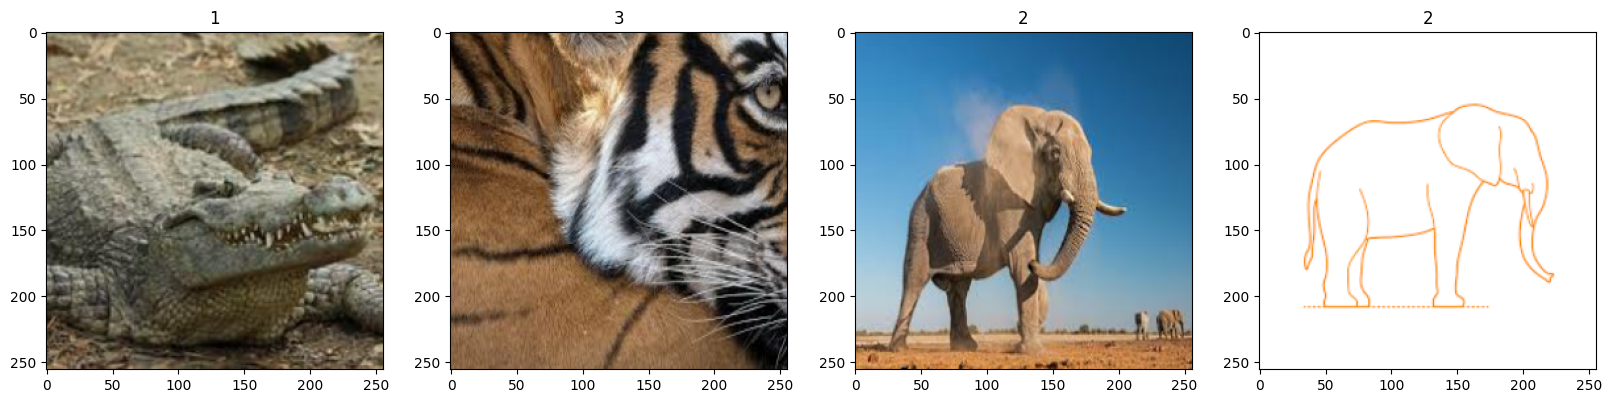

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
train_size=int(len(data)*0.9)
test_size=int(len(data)*0.1)+1
print(test_size+train_size)
print(len(data))


52
52


In [ ]:
train=data.take(train_size)

test=data.skip(train_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
model=Sequential([Conv2D(96,(3,3),activation='relu',input_shape=(256,256,3)),MaxPooling2D(2,2),Conv2D(64,(3,3),activation='relu'),MaxPooling2D(),Flatten(),Dense(256,activation='relu'),Dense(128,activation='relu'),Dense(4,activation='softmax')])

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [ ]:
mo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 96)      2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 96)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      55360     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
model.fit(train,epochs=8)

Epoch 1/8
46/46 [==============================] - 259s 5s/step - loss: 1.5689 - accuracy: 0.3519
Epoch 2/8
46/46 [==============================] - 15s 275ms/step - loss: 1.1476 - accuracy: 0.5462
Epoch 3/8
46/46 [==============================] - 15s 273ms/step - loss: 0.6736 - accuracy: 0.7459
Epoch 4/8
46/46 [==============================] - 15s 277ms/step - loss: 0.2782 - accuracy: 0.9042
Epoch 5/8
46/46 [==============================] - 15s 272ms/step - loss: 0.1145 - accuracy: 0.9715
Epoch 6/8
46/46 [==============================] - 15s 274ms/step - loss: 0.0917 - accuracy: 0.9749
Epoch 7/8
46/46 [==============================] - 15s 271ms/step - loss: 0.0679 - accuracy: 0.9817
Epoch 8/8
46/46 [==============================] - 15s 275ms/step - loss: 0.0501 - accuracy: 0.9871


In [ ]:
loss,accuracy=model.evaluate(test)

6/6 [==============================] - 14s 203ms/step - loss: 0.0430 - accuracy: 0.9892
